<a href="https://www.kaggle.com/code/ahmadsoliman94/spaceship-prediction-eda?scriptVersionId=96232169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Modules 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [4]:
os.chdir('/kaggle/input/spaceship-titanic/')

In [5]:
!ls


sample_submission.csv  test.csv  train.csv


## Importing Data


In [529]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [7]:
print(f'Train: {train.shape} \n Test: {test.shape} \n sample_submission: {sample_submission.shape}')


Train: (8693, 14) 
 Test: (4277, 13) 
 sample_submission: (4277, 2)


In [8]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Exploratory Data Analysis

## Descriptive Statistics


In [12]:
# Train Data
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [13]:
# Test Data
test.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


## Data Visualization

<AxesSubplot:>

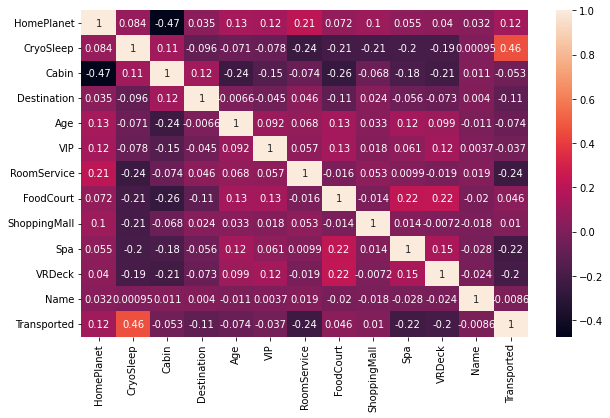

In [220]:
cor = train.corr()
top_corr_fea = cor.index
plt.figure(figsize=(10,6))
sns.heatmap(train[top_corr_fea].corr(),annot=True)

## Missing value imputation


In [14]:
# Train Data
print(train.isnull().sum().sort_values(ascending=False))

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


In [15]:
# Test Data
print(test.isnull().sum().sort_values(ascending=False))

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


## Examine numerical features

In [18]:
# Train Data
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [19]:
# Test Data
numeric_features = test.select_dtypes(include=[np.number])
print(numeric_features.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


## Examine categorical features

In [22]:
# Train Data
categorical_features = train.select_dtypes(include=[np.object_])
print(categorical_features.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


In [24]:
# Test Data
categorical_features = test.select_dtypes(include=[np.object_])
print(categorical_features.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


## Examine boolean features

In [25]:
# Train Data
categorical_features = train.select_dtypes(include=[np.bool_])
print(categorical_features.columns)

Index(['Transported'], dtype='object')


## Features Distribution Visulaization

In [34]:
# Home Planet
home = train['HomePlanet'].unique()
home

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [33]:
home_cnt = train['HomePlanet'].value_counts()
home_cnt

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

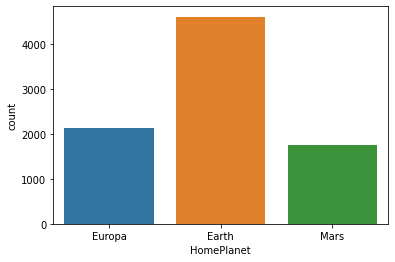

In [35]:
sns.countplot(x='HomePlanet',data=train)

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

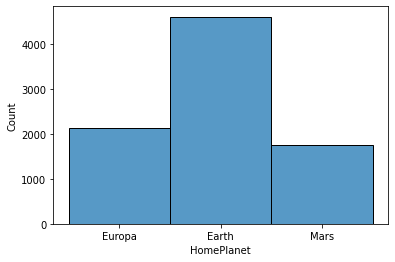

In [36]:
sns.histplot(x='HomePlanet',data=train)

In [43]:
# Destination
des = train['Destination'].unique()
des

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [45]:
des_cnt = train['Destination'].value_counts()
des_cnt

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Count'>

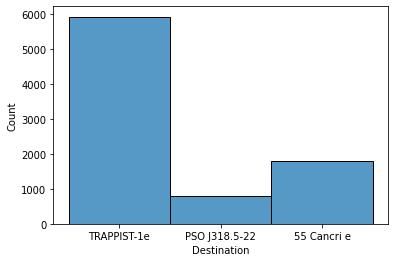

In [46]:
sns.histplot(x='Destination',data=train)

In [60]:
# Transported
trans = train['Transported'] == True
no_trans = train['Transported'] == False

print('Transported: ', len(trans)) 
print('Not Transported:', len(no_trans))

Transported:  8693
Not Transported: 8693


In [93]:
classes = [len(trans),len(no_trans)]
labels = ['Transported','Not Transported'] 
clss = {'Transported':classes[0], 'Not Transported': classes[1]}
df = pd.DataFrame(clss,index=labels)
df

,Transported,Not Transported
Transported,8693,8693
Not Transported,8693,8693


<AxesSubplot:xlabel='Age', ylabel='Count'>

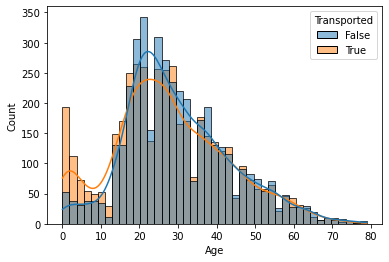

In [108]:
# Age
sns.histplot(x='Age', data=train, kde=True, hue="Transported")

# Data preprocessing 

## Handle Missing Data

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [531]:
# Train:

# Categorical Data
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0],inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0],inplace=True)
train['Cabin'].fillna(train['Cabin'].mode()[0],inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0],inplace=True)
train['VIP'].fillna(train['VIP'].mode()[0],inplace=True)
train['Name'].fillna(train['Name'].mode()[0],inplace=True)

# numerical data
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['RoomService'].fillna(train['RoomService'].mean(),inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].mean(),inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(),inplace=True)
train['Spa'].fillna(train['Spa'].mean(),inplace=True)
train['VRDeck'].fillna(train['VRDeck'].mean(),inplace=True)


# Test: 

# Categorical Data
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0],inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0],inplace=True)
test['Cabin'].fillna(test['Cabin'].mode()[0],inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0],inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0],inplace=True)
test['Name'].fillna(test['Name'].mode()[0],inplace=True)


# numerical data
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['RoomService'].fillna(test['RoomService'].mean(),inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(),inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(),inplace=True)
test['Spa'].fillna(test['Spa'].mean(),inplace=True)
test['VRDeck'].fillna(test['VRDeck'].mean(),inplace=True)

In [491]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [492]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


## Remove unnecessary columns


In [493]:
# # Train Data
# train.drop('PassengerId',axis=1,inplace=True)

# # Test Data
# test.drop('PassengerId',axis=1,inplace=True)

## Handle object Datatype


In [532]:
#Label Encoding for object to numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Train Data
objList = train.select_dtypes(include = "object").columns
print(objList)

for fea in objList:
    train[fea] = le.fit_transform(train[fea])
    

# Test Data 
objList = test.select_dtypes(include = "object").columns
print(objList)

for fea in objList:
    test[fea] = le.fit_transform(test[fea])
    

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')
Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')


## Handle boolean Datatype

In [533]:
# Train Data
boolList = train.select_dtypes(include = "bool").columns
print(boolList)

for fea in boolList:
    train[fea]  = pd.Series(np.where(train[fea] == True, 1, 0))
    
# Test Data
boolList = test.select_dtypes(include = "bool").columns
print(boolList)

for fea in boolList:
    test[fea]  = pd.Series(np.where(test[fea] == True, 1, 0))

Index(['CryoSleep', 'VIP', 'Transported'], dtype='object')
Index(['CryoSleep', 'VIP'], dtype='object')


In [500]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   int64  
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   int64  
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   int64  
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 950.9 KB


In [501]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   int64  
 1   HomePlanet    4277 non-null   int64  
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4277 non-null   int64  
 4   Destination   4277 non-null   int64  
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   int64  
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 434.5 KB


## Splitting Data

In [297]:
X = train.drop('Transported',axis=1)
y = train['Transported']

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (8693, 12) 
 y_shape: (8693,)


## Feature Selection Techniques

## Univariate feature selection

In [298]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
chi_selector = SelectKBest(chi2, k=10).fit(X, y)

In [299]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns
print(chi_feature)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')


## Splitting Data after Chooseing best features

In [331]:
X = train[chi_feature]
y = train['Transported']

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (8693, 10) 
 y_shape: (8693,)


In [301]:
y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

## Over-Sampling to deal with Imbalanced Data

In [375]:
from imblearn.over_sampling  import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,y)

print(f' X_shape: {X_smote.shape} \n y_shape: {y_smote.shape}')

 X_shape: (8756, 10) 
 y_shape: (8756,)


In [376]:
y_smote.value_counts()

0    4378
1    4378
Name: Transported, dtype: int64

## Data Standardization

In [377]:
# Without Oversampling
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [378]:
# with Oversampling
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_smote = scl.fit_transform(X_smote)

## data Splitting into train and test


In [379]:
# Without Oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (6954, 10) & X_test: (1739, 10)
 y_train: (6954,) & y_test: (1739,)


In [380]:
# With Oversampling
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_smote,y_smote,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (7004, 10) & X_test: (1752, 10)
 y_train: (7004,) & y_test: (1752,)


## Model Selection


### RandomForest Classifier


In [381]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Without Oversampling

rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

rf_clf.fit(X_train, y_train)
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

In [382]:
# With Oversampling

rf_clf_res = RandomForestClassifier(criterion='entropy',n_estimators=20)

rf_clf_res.fit(X_train_res, y_train_res)
y_pred_test_res = rf_clf_res.predict(X_test_res)
y_pred_train_res = rf_clf_res.predict(X_train_res)

In [383]:
print('Accuracy of Train befor Oversampling: {}'.format(accuracy_score(y_train, y_pred_train)*100))
print('Accuracy of  Test befor Oversampling: {}'.format(accuracy_score(y_test,y_pred_test)*100))
print('********************************************************')
print('Accuracy of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy of Train befor Oversampling: 99.6548748921484
Accuracy of  Test befor Oversampling: 78.83841288096608
********************************************************
Accuracy of Train after Oversampling: 99.64306110793832
Accuracy of Test after Oversampling: 79.50913242009132


## Uesing RandomizedSearchCV

In [384]:
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [390]:
from sklearn.model_selection import RandomizedSearchCV


# Without Oversampling

parameters= {'n_estimators':[100,200,300],
             'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9],
             'bootstrap' : [True, False],
             'random_state': [0]
            }

search = RandomizedSearchCV(estimator = rf_clf,        # The Classifer That we need its best Parameters 
                            param_distributions= parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)

search = search.fit(X_train, y_train)
print("best accuracy is :" , search.best_score_ * 100)
search.best_params_ 

best accuracy is : 79.55138118118015


{'random_state': 0,
 'n_estimators': 100,
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': True}

In [391]:
# With Oversampling

parameters= {'n_estimators':[100,200,300],
             'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9],
             'bootstrap' : [True, False],
             'random_state': [0]
            }

search_res = RandomizedSearchCV(estimator = rf_clf,        # The Classifer That we need its best Parameters 
                            param_distributions= parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)

search_res = search_res.fit(X_train_res, y_train_res)
print("best accuracy is :" , search_res.best_score_ * 100)
search_res.best_params_ 

best accuracy is : 79.66885897828082


{'random_state': 0,
 'n_estimators': 100,
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': True}

## Applying k-Fold Cross Validation

In [392]:
rf = search.best_estimator_
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [393]:
rf_res = search_res.best_estimator_
rf_res.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=9, random_state=0)

In [394]:
from sklearn.model_selection import cross_val_score
rf_clf_results = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
rf_clf_results_res = cross_val_score(estimator = rf_res, X = X_train_res, y = y_train_res, cv = 5)

rf_clf_pred = rf.predict(X_test)
rf_clf_res_pred = rf_res.predict(X_test_res)


print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (rf_clf_results.mean()*100.0, rf_clf_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (rf_clf_results_res.mean()*100.0, rf_clf_results_res.std()*100.0))
print('********************************************************')

print('Accuracy score of Test  befor Oversampling: {}'.format(accuracy_score(y_test,rf_clf_pred)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,rf_clf_res_pred)*100))

Validation score befor Oversampling: 79.55138% (0.92706%)
Validation score after Oversampling: 79.66886% (1.04854%)
********************************************************
Accuracy score of Test  befor Oversampling: 78.953421506613
Accuracy score of Test after Oversampling: 80.59360730593608


## Model Evaluation

In [395]:
from sklearn.metrics import confusion_matrix

# After Oversampling
print(confusion_matrix(y_test_res, rf_clf_res_pred))

[[686 199]
 [141 726]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


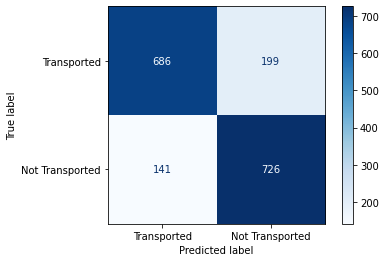

In [396]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rf_res, X_test_res, y_test_res,
                              display_labels=['Transported','Not Transported'],
                              cmap=plt.cm.Blues)

In [398]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, rf_clf_res_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       885
           1       0.78      0.84      0.81       867

    accuracy                           0.81      1752
   macro avg       0.81      0.81      0.81      1752
weighted avg       0.81      0.81      0.81      1752



## XGB Classifier

In [411]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic')

In [412]:
# Without Oversampling

from scipy import stats
from scipy.stats import randint
parameters = {'n_estimators': stats.randint(150, 300),
              'learning_rate': stats.uniform(0.01, 0.3),
              'subsample': stats.uniform(0.3, 0.5),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }
search = RandomizedSearchCV(estimator = xgb_clf,        # The Classifer That we need its best Parameters 
                            param_distributions= parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)

search = search.fit(X_train, y_train)
print("best accuracy is :" , search.best_score_ * 100)
search.best_params_ 

best accuracy is : 79.0335921054673


{'colsample_bytree': 0.8987935780793201,
 'learning_rate': 0.1579786765239343,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 249,
 'subsample': 0.4096974346922459}

In [413]:
# With Oversampling

parameters = {'n_estimators': stats.randint(150, 300),
              'learning_rate': stats.uniform(0.01, 0.3),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }
search_res = RandomizedSearchCV(estimator = xgb_clf,        # The Classifer That we need its best Parameters 
                            param_distributions= parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)

search_res = search_res.fit(X_train_res, y_train_res)
print("best accuracy is :" , search_res.best_score_ * 100)
search_res.best_params_ 

best accuracy is : 80.13994085857041


{'colsample_bytree': 0.7001889569506905,
 'learning_rate': 0.06156963728585953,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 281,
 'subsample': 0.5718108180353373}

In [414]:
xgb = search.best_estimator_
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8987935780793201, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1579786765239343,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=249, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [415]:
xgb_res = search_res.best_estimator_
xgb_res.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7001889569506905, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.06156963728585953,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=281, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [416]:
xgb_clf_results = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 5)
xgb_clf_results_res = cross_val_score(estimator = xgb_res, X = X_train_res, y = y_train_res, cv = 5)

xgb_clf_pred = xgb.predict(X_test)
xgb_clf_res_pred = xgb_res.predict(X_test_res)


print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (xgb_clf_results.mean()*100.0, xgb_clf_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (xgb_clf_results_res.mean()*100.0, xgb_clf_results_res.std()*100.0))
print('********************************************************')

print('Accuracy score of Test  befor Oversampling: {}'.format(accuracy_score(y_test,xgb_clf_pred)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,xgb_clf_res_pred)*100))

Validation score befor Oversampling: 79.03359% (1.23415%)
Validation score after Oversampling: 80.13994% (0.79480%)
********************************************************
Accuracy score of Test  befor Oversampling: 79.58596894767108
Accuracy score of Test after Oversampling: 80.36529680365297


In [417]:
# After Oversampling
print(confusion_matrix(y_test_res, xgb_clf_res_pred))

[[695 190]
 [154 713]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


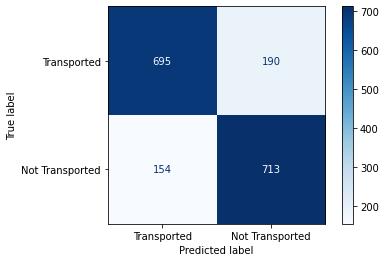

In [418]:
disp = plot_confusion_matrix(xgb_res, X_test_res, y_test_res,
                              display_labels=['Transported','Not Transported'],
                              cmap=plt.cm.Blues)

In [419]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, rf_clf_res_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       885
           1       0.78      0.84      0.81       867

    accuracy                           0.81      1752
   macro avg       0.81      0.81      0.81      1752
weighted avg       0.81      0.81      0.81      1752



## LGBM Classifier

In [421]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()

In [422]:
lgb_clf.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [427]:
# With Oversampling

parameters = {        
      'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550),
        'n_estimators': stats.randint(150, 400),

        'learning_rate': stats.uniform(0.01, 0.3),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }
search_res = RandomizedSearchCV(estimator = lgb_clf,        # The Classifer That we need its best Parameters 
                            param_distributions= parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)

search_res = search_res.fit(X_train_res, y_train_res)
print("best accuracy is :" , search_res.best_score_ * 100)
search_res.best_params_ 

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5066130765717141 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.620441718322909 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5066130765717141 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.620441718322909 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction 

{'bagging_fraction': 0.8,
 'bagging_frequency': 5,
 'colsample_bytree': 0.72832906636513,
 'feature_fraction': 0.5,
 'learning_rate': 0.07214181817092007,
 'max_depth': 4,
 'min_child_weight': 3,
 'min_data_in_leaf': 120,
 'n_estimators': 153,
 'num_leaves': 1550,
 'subsample': 0.7969799214325664}

In [556]:
lgb_clf = search_res.best_estimator_
lgb_clf.fit(X_train_res, y_train_res)

LGBMClassifier(bagging_fraction=0.8, bagging_frequency=5,
               colsample_bytree=0.72832906636513, feature_fraction=0.5,
               learning_rate=0.07214181817092007, max_depth=4,
               min_child_weight=3, min_data_in_leaf=120, n_estimators=153,
               num_leaves=1550, subsample=0.7969799214325664)

In [557]:
lgb_clf_results_res = cross_val_score(estimator = lgb_clf, X = X_train_res, y = y_train_res, cv = 5)

lgb_clf_res_pred = lgb_clf.predict(X_test_res)

print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (lgb_clf_results_res.mean()*100.0, lgb_clf_results_res.std()*100.0))
print('********************************************************')
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,lgb_clf_res_pred)*100))

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.72832906636513 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7969799214325664 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.72832906636513 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7969799214325664 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


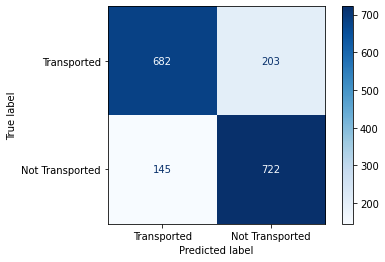

In [558]:
disp = plot_confusion_matrix(lgb_clf, X_test_res, y_test_res,
                              display_labels=['Transported','Not Transported'],
                              cmap=plt.cm.Blues)

In [441]:
print(classification_report(y_test_res, lgb_clf_res_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       885
           1       0.78      0.83      0.81       867

    accuracy                           0.80      1752
   macro avg       0.80      0.80      0.80      1752
weighted avg       0.80      0.80      0.80      1752



## Voting Classifier


In [437]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier([('rf',rf_res),('xgb',xgb_res),('lgb',lgb)],verbose=True)
voting_clf.fit(X_train_res,y_train_res)
voting_clf_results = cross_val_score(estimator = voting_clf, X = X_train_res, y = y_train_res, cv = 5)
voting_clf_pred = voting_clf.predict(X_test_res)

[Voting] ....................... (1 of 3) Processing rf, total=   0.8s
[Voting] ...................... (2 of 3) Processing xgb, total=   2.1s
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.72832906636513 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7969799214325664 will be ignored. Current value: bagging_fraction=0.8
[Voting] ...................... (3 of 3) Processing lgb, total=   0.3s
[Voting] ....................... (1 of 3) Processing rf, total=   0.7s
[Voting] ...................... (2 of 3) Processing xgb, total=   1.9s
[Voting] ...................... (3 of 3) Processing lgb, total=   0.3s
[Voting] ....................... (1 of 3) Processing rf, total=   0.7s
[Voting] ...................... (2 of 3) Processing 

In [438]:
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (voting_clf_results.mean()*100.0, voting_clf_results.std()*100.0))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,voting_clf_pred)*100))

Validation score after Oversampling: 80.33983% (0.87086%)
Accuracy score of Test after Oversampling: 80.42237442922374


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


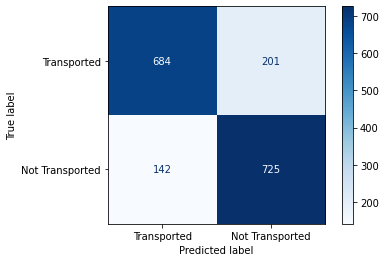

In [439]:
disp = plot_confusion_matrix(voting_clf, X_test_res, y_test_res,
                              display_labels=['Transported','Not Transported'],
                              cmap=plt.cm.Blues)

In [440]:
print(classification_report(y_test_res, voting_clf_pred))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80       885
           1       0.78      0.84      0.81       867

    accuracy                           0.80      1752
   macro avg       0.81      0.80      0.80      1752
weighted avg       0.81      0.80      0.80      1752



In [444]:
rf = accuracy_score(y_test_res,rf_clf_res_pred)*100
xgb = accuracy_score(y_test_res,xgb_clf_res_pred)*100
lgb = accuracy_score(y_test_res,lgb_clf_res_pred)*100
voting = accuracy_score(y_test_res,voting_clf_pred)*100

scores = [rf,xgb,lgb,voting]
labels = ['Random Forest Classifier', 'XGB Classifier','LGB Classifier', 'Voting Classifier']
accs = {'Accuracy': scores}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Random Forest Classifier,80.593607
XGB Classifier,80.365297
LGB Classifier,80.136986
Voting Classifier,80.422374


## Model Deployment


In [550]:
test = test[chi_feature]

In [561]:
predicted = rf_res.predict(test)
predicted

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 0, 1, ..., 1, 1, 1])

In [562]:
finalPreds = pd.DataFrame(predicted.astype(bool))
finalPreds.insert(0,"PassngerId", sample_submission.PassengerId)
finalPreds.columns = sample_submission.columns
finalPreds.to_csv('/kaggle/working/submission3.csv', index = False)